## 线性回归的从零开始实现

In [36]:
%matplotlib inline
import random
import torch
import sys
sys.path.append(r"/Users/kingsleycheng/Documents/github/UCAS/DeepLearning/D2L/")
import mytorch
import matplotlib.pyplot as plt

### 生成数据集

feature: tensor([-1.6511, -2.0465]) 
labels: tensor([7.8673])


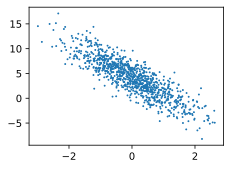

In [37]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = mytorch.synthetic_data(true_w,true_b,1000)
print(f'feature: {features[0]} \nlabels: {labels[0]}')
mytorch.set_figsize()
plt.scatter(features[:,1].detach().numpy(), labels.detach().numpy(), 1)

### 读取数据集

In [38]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices =list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples,batch_size):
        batch_indices = torch.tensor(
            indices[i:min(i+batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices] # yield的函数则返回一个可迭代的 generator（生成器）对象

batch_size = 10
for X,y in data_iter(batch_size,features,labels):
    print(X, '\n', y)
    break

tensor([[-1.7750,  0.6100],
        [ 0.6778,  0.3332],
        [-0.7682, -1.4222],
        [ 0.2299, -0.9892],
        [-0.3528,  0.3978],
        [ 1.0856, -0.8535],
        [ 0.2957,  0.6972],
        [-0.1244, -0.3095],
        [-0.7462,  0.1412],
        [ 0.3111, -0.7846]]) 
 tensor([[-1.4144],
        [ 4.4126],
        [ 7.4879],
        [ 8.0139],
        [ 2.1426],
        [ 9.2654],
        [ 2.4184],
        [ 4.9958],
        [ 2.2284],
        [ 7.4841]])


### 初始化模型参数

In [39]:
w = torch.normal(0, 0.01, size = (2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

### 定义模型

In [40]:
def linreg(X, w, b):
    return torch.matmul(X,w) + b

### 定义损失函数

In [41]:
def squared_loss(y_hat, y):
    return (y_hat-y.reshape(y_hat.shape))**2 / 2

### 定义优化算法

In [42]:
def sgd(params, lr, batch_size):
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

### 训练

In [43]:
lr = 0.03
num_epochs = 5
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l = loss(net(X,w,b),y) # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b],lr, batch_size) # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features,w,b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.047838
epoch 2, loss 0.000203
epoch 3, loss 0.000052
epoch 4, loss 0.000051
epoch 5, loss 0.000051


In [44]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([-5.5552e-05, -1.7214e-04], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0007], grad_fn=<RsubBackward1>)
